In [2]:
%run util.py

# Exercise 6.4.4

ODE System

$$
\begin{align}
x' &= x(1- y) \\
y' &= y(\rho - x)
\end{align}
$$

Let's consider the fixed points first. From the first equation we get $x=0$ and $y=1$. Inserting $x=0$ into the second equation yields $0 = y \rho$ and from this follows $y = 0$. So there is one fixed point at $(0,0)$.
Inserting $y = 1$ into the second equation yields $0 = \rho - x$ and therefore the second fixed point is at $(\rho, 1)$.

Let's look at the fixed points and the trajectories.

In [4]:
rho = 2

In [7]:
def dX_dt(X, t=0):
    return np.array([X[0] - X[0]*X[1],
                     X[1] *(rho - X[0])])

Using `Norm = True` provides a better picture of fixed points - thereby we can verify the fixed points at $(0,0)$ and $(\rho, 1)$; using `Norm = False` provides a getter picture of the dynamics involved.

Anyway, the fixed point at $(0,0)$ is an instable point. Starting with $(\epsilon, 0)$ gives a blowup of the first species, starting with $(0, \epsilon)$ gives a blowup of the second species. This makes sense as every species has inifinte carrying capacity.

The second fixed point at $(\rho, 1)$, however, is also an instable saddle point. Small deviations from it lead to a blowup of one species and the exinction of the other.

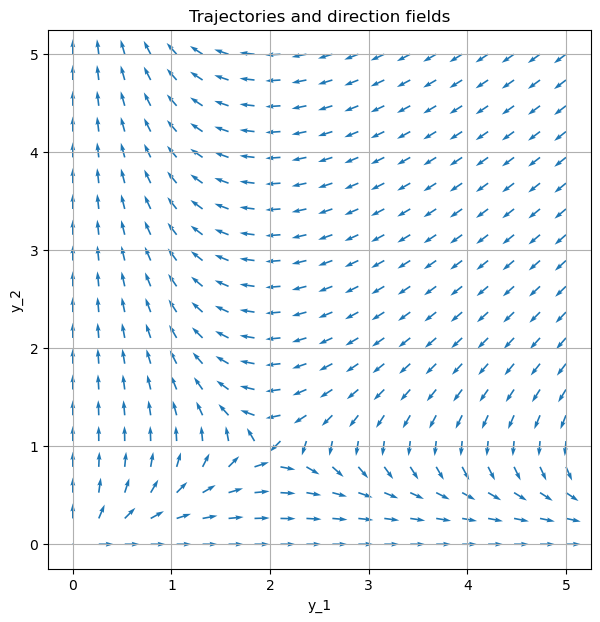

In [17]:
vField(0, 5, 0, 5, dX_dt, Norm = True)

In [19]:
tmax = 7
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [1.99, 0.99], t)
infodict['message']

'Integration successful.'

(0.0, 5.0)

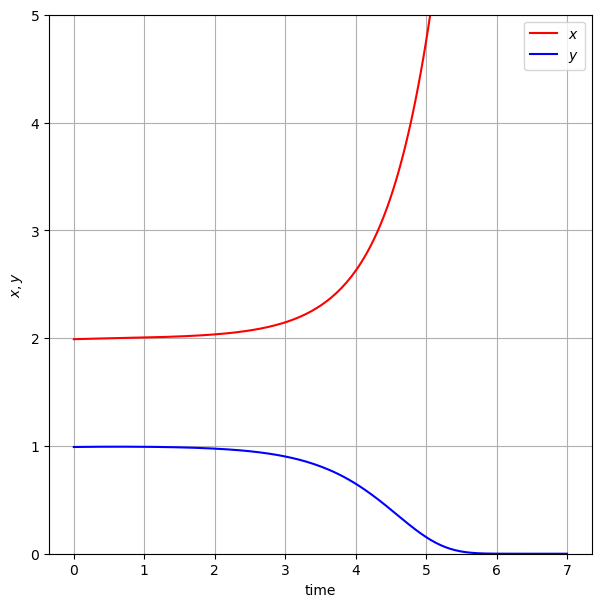

In [21]:
x, y = X.T

plt.plot(t, x, 'r-', label='$x$')
plt.plot(t, y  , 'b-', label='$y$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$x, y$')
plt.ylim([0,5])

## Analytical Solutions

Noting that $x' = \frac{dx}{dt}$ and $y' = \frac{dy}{dt}$, we can (formally) obtain

$$
\frac{\frac{dy}{dt}}{\frac{dx}{dt}} = \frac{y(\rho-x)}{x(1-x)} = \frac{dy}{dx}
$$

We can use separation of variables to obtain

$$
\frac{1-y}{y} dy = \frac{\rho-x}{x} dx
$$

which we can integrate to obtain

$$
\ln y - y = \rho \ln x - x + C
$$

Plot is shown below; not sure if this is super helpful...

Text(0, 0.5, '$y(x)$')

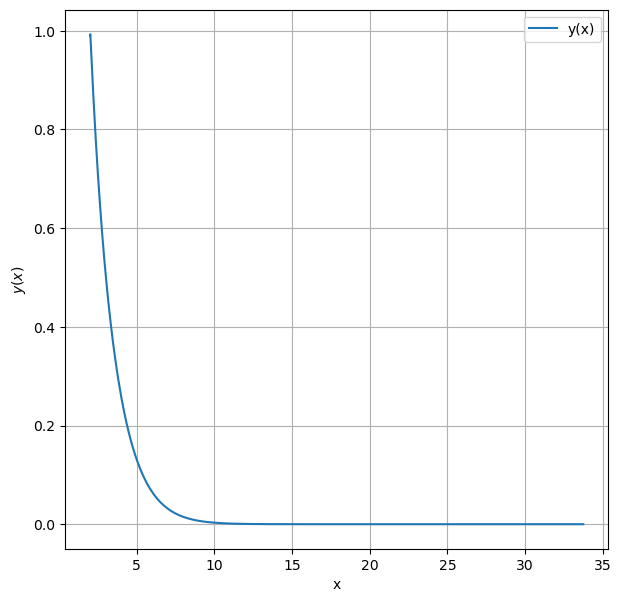

In [23]:
plt.plot(x,y, label='y(x)')
plt.grid()
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('$y(x)$')

# Exercise 6.4.5

Before we start, we consider a 1D case with a finite carrying capacity.

## 1D Model

That is, we consider

$$
x' = x(1 - x / K)
$$

Fixed points are $x=0$ and $x = K$.

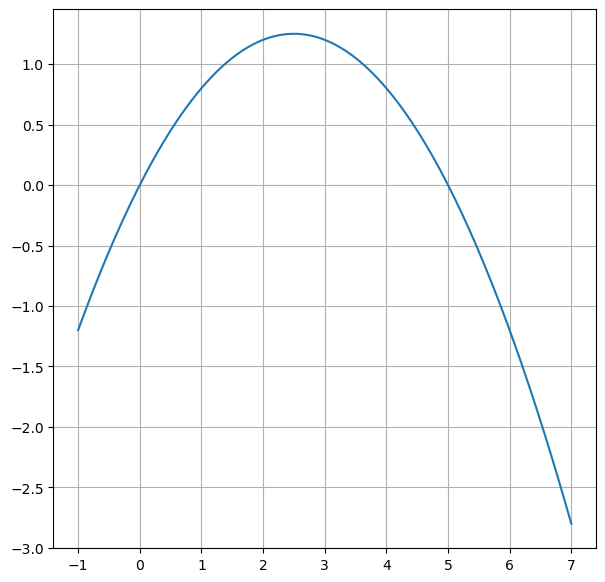

In [25]:
K = 5
x = np.linspace(-1, K+2, 200)
xprime = x*(1 - x/K)
plt.plot(x, xprime)
plt.grid(True)

In [27]:
def dX_dt(X, t=0):
    return np.array([X[0]*(1 - X[0] / K)])

In [29]:
tmax = 10
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [0.1], t)
#X, infodict = solveODE(dX_dt, [10.0], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$x$')

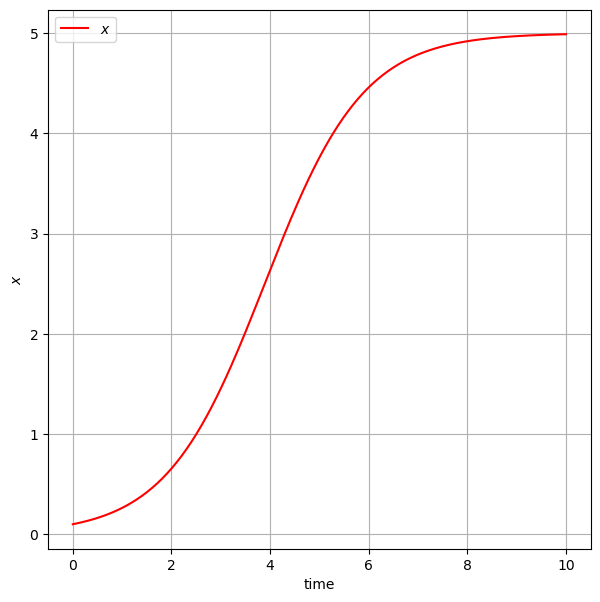

In [31]:
x = X

plt.plot(t, x, 'r-', label='$x$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$x$')

So every population $0 < x < K$ grows to $x = K$ and every population $K < x$ decreases to $x = K$.

## 2D Model

This model is asymmetric: Population $x$ has a carrying capacity of $K$, whereas population $y$ has no such constraint.

$$
\begin{align}
x' &= x(1-x/K) - b_1 xy \\
y' &= y - b_2 x y = y(1-b_2 x)
\end{align}
$$

In [56]:
K = 8.
# negative y of first fixed point
#b1 = 0.5
#b2 = 0.1

b1 = 0.1
b2 = 0.5

To get the fixed points, we start with the second equation. One option is $1 - b_2 x = 0 \rightarrow x = 1/b_2$. Inserting this into the first equation and setting $x' = 0$ yields

$$
(x_f, y_f) = \left(\frac{1}{b_2}, \frac{b_2 K - 1}{b_1 b_2 K} \right)
$$

Note that this fixed point has $y_f < 0$ when $b_2 K < 1$. Furthermore, it is unstable (see simulations below). In the fixed point, the growth/decline rates of both populations equal each other and the populations stay constant.

If we start with an initial value $x < x_f$ (ie left of the fixed point in the Figure below), then species 1 does not kill enough of species 2. So species 2 will grow, killing more and more of species 1. Since there is no carrying capacity for species 2, it will grow unbounded.

If we start with an initial value $x > x_f$ (ie right of the fixed point in the Figure below), it is just the other way round with the *difference* that species 1 has a finite carrying capacity. So, after species 1 has killed all of species 2, it will eventually reach its carrying capacity $K$.

The other option in the second equation is at $y=0$. Inserting this into the first equation, we obtain

$$
0 = x(1-x/K) \rightarrow x=0, x=K
$$

So we have two more fixed points

$$
(0,0), \, (K, 0)
$$

In [57]:
def dX_dt(X, t=0):
    return np.array([X[0]*(1 - X[0] / K) - b1*X[0]*X[1],
                     X[1] - b2 * X[0] * X[1]])

In [58]:
xf, yf = 1/b2, (b2*K-1)/(b1*b2*K)

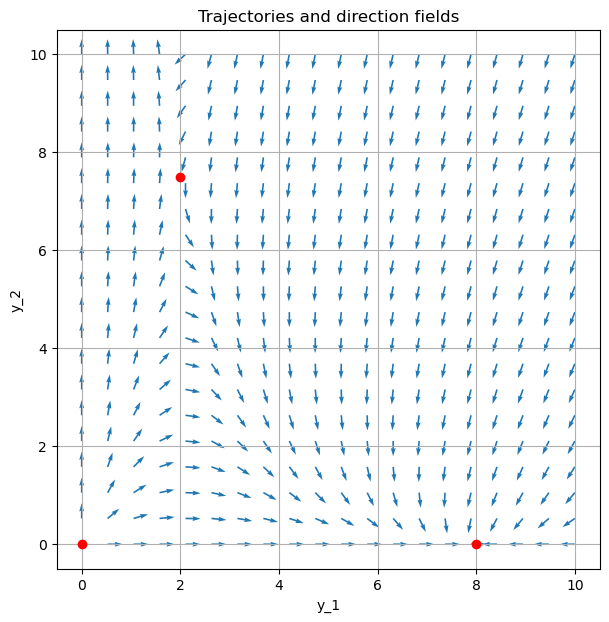

In [59]:
vField(0, 10, 0, 10, dX_dt, Norm = True)
plt.plot([0, xf, K], [0, yf, 0], 'ro')

In [62]:
tmax = 12
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [xf+0.1, yf], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$x, y$')

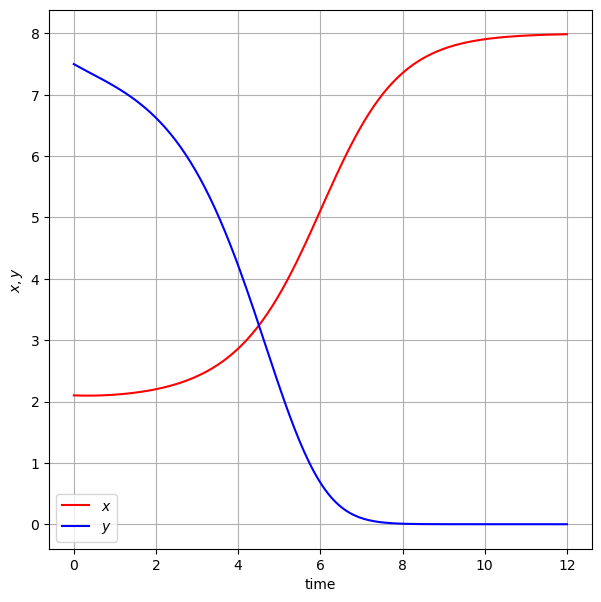

In [63]:
x, y = X.T

plt.plot(t, x, 'r-', label='$x$')
plt.plot(t, y  , 'b-', label='$y$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$x, y$')

# Exercise 6.4.6

$$
\begin{align}
x' &= x r_x (1-x/K_1) - b_1 x y \\
y' &= y r_y (1-y/K_2) - b_2 x y
\end{align}
$$

We can solve the system for fixed point using Maxima and obtain the following three "obvious" solutions

$$
(0,0), (K_1, 0), (K_2,0)
$$

and another, more complex one (by help of Maxima, see Maxima file in this folder),

$$
\frac{(K_1 r_1-K_1 K_2 b_1)r_2}{(r_1 r_2 - K_1 K_2 b_1 b_2)},-\frac{(K_2 r_2-K_1 K_2 b_2)r_1}{r_1 r_2 - K_1 K_2 b_1 b_2}
$$

In [113]:
r1 = 0.7
r2 = 0.7
K1 = 6
K2 = 6
b1 = 0.1
b2 = 0.1

In [114]:
(xf, yf) = (((K1*r1-K1*K2*b1)*r2)/(r1*r2-K1*K2*b1*b2), (K2*r1*r2-K1*K2*b2*r1)/(r1*r2-K1*K2*b1*b2))
(xf, yf)

(3.230769230769229, 3.2307692307692295)

In [115]:
J = np.array([[r1 - 2*xf*r1/K1 - b1*yf, -b1*xf],[-b2*yf, r2 - 2*yf*r2/K2 - b2*xf]])
lin.eig(J)

(array([-0.05384615+0.j, -0.7       +0.j]),
 array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))

In [116]:
def dX_dt(X, t=0):
    return np.array([X[0]*r1*(1 - X[0] / K1) - b1*X[0]*X[1],
                     X[1]*r2*(1 - X[1] / K2) - b2*X[0]*X[1]])

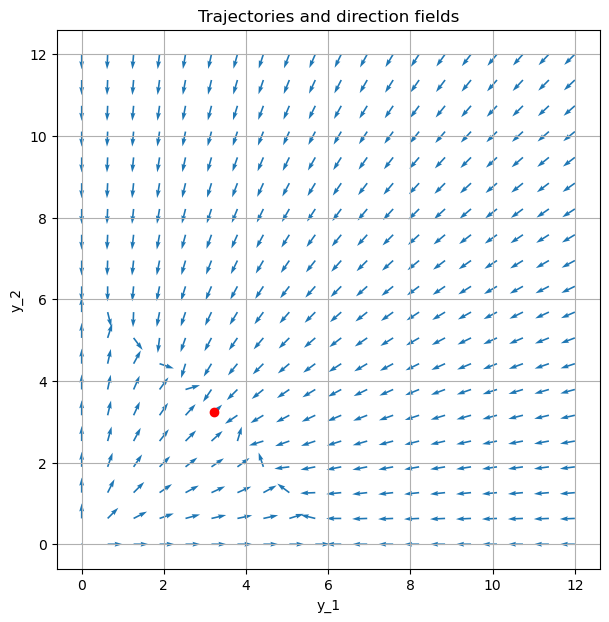

In [117]:
vField(0, 12, 0, 12, dX_dt, Norm = True)
plt.plot([xf], [yf], 'ro')

In [124]:
tmax = 50
t = np.linspace(0, tmax, 200)
X, infodict = solveODE(dX_dt, [2, 1], t)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$x, y$')

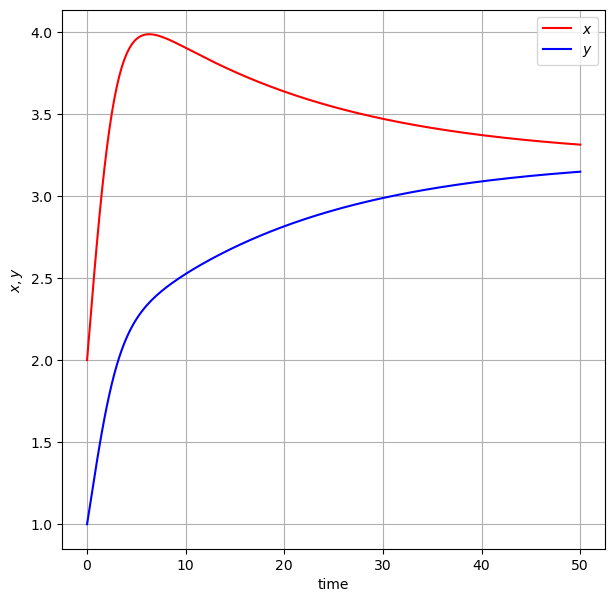

In [125]:
x, y = X.T

plt.plot(t, x, 'r-', label='$x$')
plt.plot(t, y  , 'b-', label='$y$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$x, y$')

## Conclusion (preliminary)

In general, when the parameters are different, I was not able to find parameters which resulted in a stable fixed point. It seems as if stable coexistence is not possible in this general case.

When the two species do not interact with each other ($b_1 = b_2 = 0$), there is a stable fixed point at $(K_1, K_2)$. Each species grows (undisturbed by the other species) until the carrying capacity is reached and growth stop there.

When the parameters for both species are the same; ie $b_1 = b_2 \neq 0, K_1 = K_2, r_1 = r_2$, the fixed point calculated above is stable. Its form simplifies to

$$
x_f = y_f = \frac{rK}{r+b K}
$$